In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import urllib
import gzip
import urllib.request
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import datasets
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import re
import shutil
from csv import reader
from itertools import permutations , combinations ,product
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score

In [65]:
# Getting data from URL 

df1 = pd.DataFrame()
df1 = pd.read_csv("https://www.eecs.uottawa.ca/~turcotte/teaching/csi-5180/assignments/1/human_skin_microbiome.csv")
df1.columns = ["Organism","URL"]

In [66]:
path = "Data"
if not os.path.exists(path):
    os.makedirs(path)

In [67]:
# unzipping the data

for i in range(len(df1)):
    filename = os.path.join(path, df1.Organism[i] +'.fna.gz')
    urllib.request.urlretrieve(df1.URL[i], filename)
    with gzip.open(filename, 'rb') as f_in:
        filename1 = os.path.join(path, df1.Organism[i] +'.txt')
        with open(filename1, 'wb') as f_out:  
            shutil.copyfileobj(f_in, f_out)

In [68]:
# Writing the data into a file

for filename in os.listdir(path):
    if filename.endswith(".txt"):
        with open(path+"/"+filename ,"r") as f_in:
             line = f_in.readlines()
        with open("sequence.txt" ,"w") as f_out:
             for sequence in line:
                sequence = sequence.upper()
                if not sequence.startswith('>'):
                    f_out.write(sequence)

In [69]:
#Reading file

with open ("sequence.txt" , "r") as f:
        line = f.readlines()
        

In [70]:
# converting lines to string 

string = ''.join(line)

In [71]:
s_string = string.replace("\n","")

In [72]:
# computing frequency vector 

char = ["A","C","G","T"]

character  = []

for all_combinations in product(char,repeat = 4):
    character.append("".join(all_combinations))
    
frequency_vector = []

i = 1
for i in range(len(character)):
    occurrence = str(s_string.count(character[i]))
    percent_occurrence = float(occurrence)/len(s_string)*100
    frequency_vector.append((round(percent_occurrence,2)))

In [73]:
# checking length of frequency vector

print(len(frequency_vector))

256


In [74]:
df2 = pd.DataFrame(frequency_vector)

In [75]:
# calculating KMeans for frquency vector

k_means = KMeans(n_clusters=3, init='random' ,n_init=10, max_iter=300, 
    tol=1e-04, random_state=0)
model = k_means.fit_predict(df2)

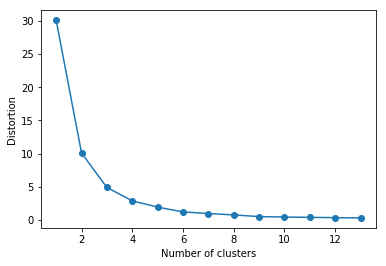

In [76]:
# Finding out possible number of inertia for K-means

distortions = []

for i in range(1, 14):
    k_means = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0)
    
    k_means.fit(df2)
    distortions.append(k_means.inertia_)

# plot
plt.plot(range(1, 14), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

cluster number: 2
score  0.6758456202745239
cluster number: 3
score  0.6075864691750459
cluster number: 4
score  0.5795027196646473
cluster number: 5
score  0.5725895956512534
cluster number: 6
score  0.5754030501884712
cluster number: 7
score  0.5684907176483099
cluster number: 8
score  0.6046360041353125
cluster number: 9
score  0.57569452599831
cluster number: 10
score  0.5677726283902034
cluster number: 11
score  0.569116396857835
cluster number: 12
score  0.529843676558163
cluster number: 13
score  0.5251334042971381
###################################
maximum score 0.6758456202745239
###################################


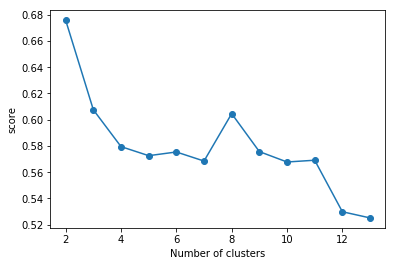

In [77]:
# Finding out silhouttie score

scores = []
cluster = []

for i in range(2, 14):
    k_means = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0)
    
    k_means.fit(df2)
    
    preds = k_means.fit_predict(df2)
    
    score = silhouette_score (df2, preds, metric='euclidean')
    print("cluster number:" ,i)
    print("score " , score)
    
    cluster.append(i)
    scores.append(score)
    
# finding out the maximum 

print("###################################")
maximum_score = max(scores)
print("maximum score",maximum_score)
print("###################################")

# PLOT

plt.plot(range(2, 14), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('score')
plt.show()    

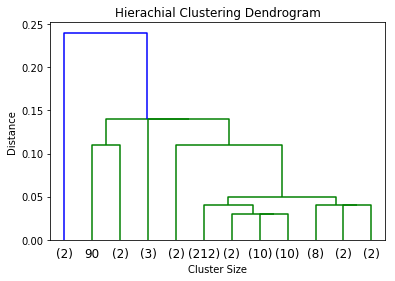

In [79]:
# Results of hierarchial cluster Analysis

z = linkage(df2,"single")

dendrogram(z,truncate_mode= "lastp" ,p = 12 )
plt.title("Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

#divide the cluster
plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()